In [1]:
from src import *
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
ibov = pd.read_csv('tests/ibov.csv', header=None).set_index(0)[1]
ibov.name='IBOV'

In [3]:
all_assets = get_assets()

In [4]:
fin_assets = all_assets[all_assets['setor'] == 'Financeiro'].index.intersection(ibov.index)

In [17]:
pl = get_pl('VALE3')
pl

,cot_nominal,cot_ajust_acoes,cot_ajust_acoes_dinheiro
datascotacoes,,,
2001-01-02,7.868852,0.655738,0.218579
2001-01-03,8.378871,0.697632,0.233151
2001-01-04,8.105647,0.675774,0.225865
2001-01-05,8.014572,0.668488,0.222222
2001-01-08,7.923497,0.661202,0.220401
...,...,...,...
2023-10-06,5.331738,5.331738,5.331738
2023-10-09,5.293461,5.293461,5.293461
2023-10-10,5.325359,5.325359,5.325359


In [155]:
asset = fin_assets[0]
table = get_tables(asset,'(Resumo DRE Últimos Doze Meses|Resumo Balanço Patrimonial)')
if 'Lucro/Ação' in table['Resumo DRE Últimos Doze Meses'].columns:
    lpa = table['Resumo DRE Últimos Doze Meses']['Lucro/Ação'] \
        .str.replace('-?\s*R\$','',regex=True) \
        .str.replace(',','.',regex=False) \
        .str.replace('NA','NAN') \
        .astype(float) \
        .sort_index()
else:
    ll = table['Resumo DRE Últimos Doze Meses']['Lucro Líquido'].sort_index().apply(lambda l: eval(l.replace('R$','').replace('T','*10**3B').replace('B','*10**3M').replace('M','*10**6').replace(' ','').replace('.','').replace(',','.').replace('NA','None')))
    na = table['Resumo Balanço Patrimonial']['Total'].sort_index().apply(lambda l: eval(l.replace('R$','').replace('T','*10**3B').replace('B','*10**3M').replace('M','*10**6').replace(' ','').replace('.','').replace(',','.').replace('NA','None')))
    lpa = ll/na
# cot_nominal	cot_ajust_acoes	cot_ajust_acoes_dinheiro
lpa.dropna(inplace=True)
prices = get_prices(asset)

/tmp/ipykernel_18707/1588526371.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lpa_full = pd.Series(index=prices.index.union(lpa.index))


<Axes: xlabel='datascotacoes'>

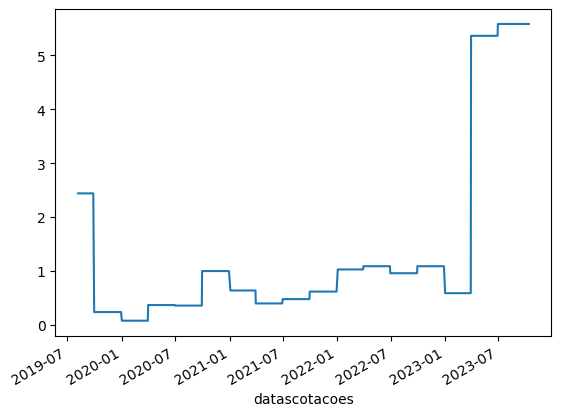

In [156]:
lpa_full = pd.Series(index=prices.index.union(lpa.index))
lpa_full.loc[lpa.index] = lpa
lpa_full.ffill(inplace=True)
lpa_full = lpa_full[prices.index]
lpa_full.dropna().plot()

ALSO3


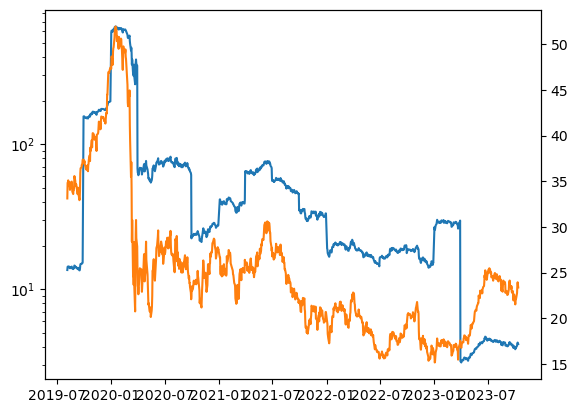

In [157]:
price_types = ['cot_nominal', 'cot_ajust_acoes', 'cot_ajust_acoes_dinheiro']
price_type = price_types[2]
plt.plot((prices[price_type]/lpa_full))
plt.yscale('log')
plt.twinx()
plt.plot(prices[price_type],c='C1')
print(asset)

In [135]:
lpa.index.get_loc(lpa_full, method='nearest')

InvalidIndexError: datascotacoes
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
              ..
2023-10-06   NaN
2023-10-09   NaN
2023-10-10   NaN
2023-10-11   NaN
2023-10-13   NaN
Length: 5884, dtype: float64

In [105]:
prices

,volumes,cot_nominal,cot_ajust_acoes,cot_ajust_acoes_dinheiro
datascotacoes,,,,
2000-01-03,512567,42.00,3.50,1.08
2000-01-04,675650,41.00,3.42,1.06
2000-01-05,1594700,41.00,3.42,1.06
2000-01-06,686704,41.00,3.42,1.06
2000-01-07,4726890,42.50,3.54,1.10
...,...,...,...,...
2023-10-06,1514944097,66.86,66.86,66.86
2023-10-09,941790727,66.38,66.38,66.38
2023-10-10,1217012543,66.78,66.78,66.78


In [100]:
import matplotlib.pyplot as plt

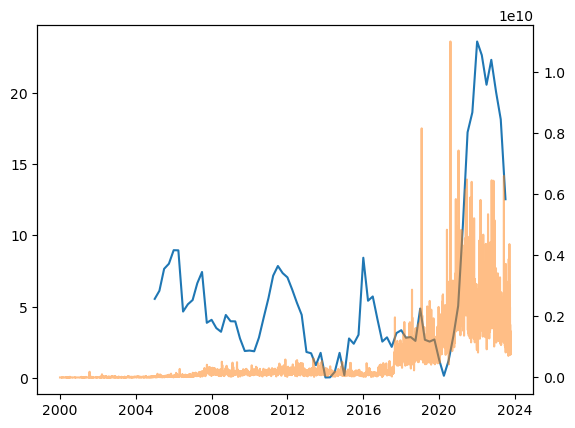

In [116]:
plt.plot(lpa)
plt.twinx()
plt.plot(prices.volumes,c="C1",alpha=0.5)

In [6]:
from src import get_assets
all_assets = get_assets()

In [61]:
from src import get_dupont, get_prices
dupont = get_dupont(assets[0])
prices = get_prices(assets[0])

In [67]:
prices_pct = prices.cot_ajust_acoes_dinheiro.pct_change().fillna(0)
# ((1+prices_pct).cumprod()-1).plot()

In [ ]:
# calcula extremos trimestrais (high/low)
price_pct_trimestral = pd.DataFrame(columns=['high','low'], index=dupont.index[:-1])
for interval in zip(dupont.index[:-1], dupont.index[1:]):
    t1,t2 = interval
    price_interval = prices_pct.loc[t1:t2]
    price_interval = (1+price_interval).cumprod()-1
    price_pct_trimestral.loc[t1,'high'] = price_interval.max()
    price_pct_trimestral.loc[t1,'low'] = price_interval.min()
price_pct_trimestral = price_pct_trimestral.astype(float)

In [ ]:
data = dupont.join(price_pct_trimestral,how='outer').dropna()

In [13]:
data.corr()[['high','low']].sort_values(['high','low'],ascending=False)

NameError: name 'data' is not defined

In [761]:
data[data['high']<0.1].corr()[['high','low']].sort_values(['high','low'],ascending=False)

,high,low
high,1.000000,0.499541
low,0.499541,1.000000
MARGEM_LIQUIDA_ANUAL,0.282169,0.229593
RETORNO_ATIVO_ANUAL,0.178996,-0.002169
RETORNO_PL_ANUAL,0.134821,-0.113694
ALAVANCAGEM_FINANCEIRA_ANUAL,0.083036,-0.241537
GIRO_ATIVO_ANUAL,-0.059192,-0.201758


In [900]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop(['high','low'],axis=1).values
y = (data['high'] > 0.1).astype(int).values

train_size = (X.shape[0] * 2) // 3

X_train, X_test = X[train_size:], X[:train_size]
y_train, y_test = y[train_size:], y[:train_size]

print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])
sample_weight = y_train.mean()
print(sample_weight)

31 62 31 62
0.7096774193548387


In [935]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# cls = RandomForestClassifier(random_state=1)
cls = RandomForestClassifier(random_state=9, class_weight={0:sample_weight,1:1-sample_weight})
csl = GridSearchCV(cls, {
        'n_estimators':[10, 1000],
        'max_depth':[1,3],
        # 'class_weight':{0:[sample_weight],1:1-sample_weight},
    },
    n_jobs=-1,
    scoring=f1_score
)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_train)
print('f1=',f1_score(y_train, y_pred))
y_pred = cls.predict(X_test)
print('f1=',f1_score(y_test, y_pred))

f1= 1.0
f1= 0.5423728813559322


In [920]:
cls.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 0.7096774193548387, 1: 0.29032258064516125},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [810]:
all_assets[all_assets['setor'] == all_assets['setor'][0]].shape[0]

93

array([[19,  7],
       [25, 11]])